This is a supervised task. The data is labeled.
This is a regression task: predict a district's median housing price (VALUE), given other data about the district.
This is a multiple regression problem: more than one feature is used to predict the median housing price of that district.
This is a univariate regression problem: predict one value, ONLY.

In [110]:
print("Hello, World!")

Hello, World!


In [111]:
import numpy as np
import pandas as pd
import os

In [112]:
np.random.seed(42)

In [113]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

In [114]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [115]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [116]:
import os
import tarfile
from six.moves import urllib

In [117]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
# the url of where I download the dataset from

HOUSING_PATH = os.path.join("datasets", "housing")
# the path for the specific housing dataset; I could join "datasets", "name_of_another_dataset"

HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
# the url for the specific housing data adds the root url to the path for the dataset that I want

In [118]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        # this creates a directory, "datasets/housing" in the workspace
    tgz_path = os.path.join(housing_path, "housing.tgz")
    # this joins the housing path "datasets/housing" with "housing.tgz"; "datasets/housing/housing.tgz"
    urllib.request.urlretrieve(housing_url, tgz_path)
    # retrieve from the github, the dataset, and save that to the tgz_path on my computer
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [119]:
fetch_housing_data()

In [120]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [121]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [122]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [123]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [124]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<function matplotlib.pyplot.show(close=None, block=None)>

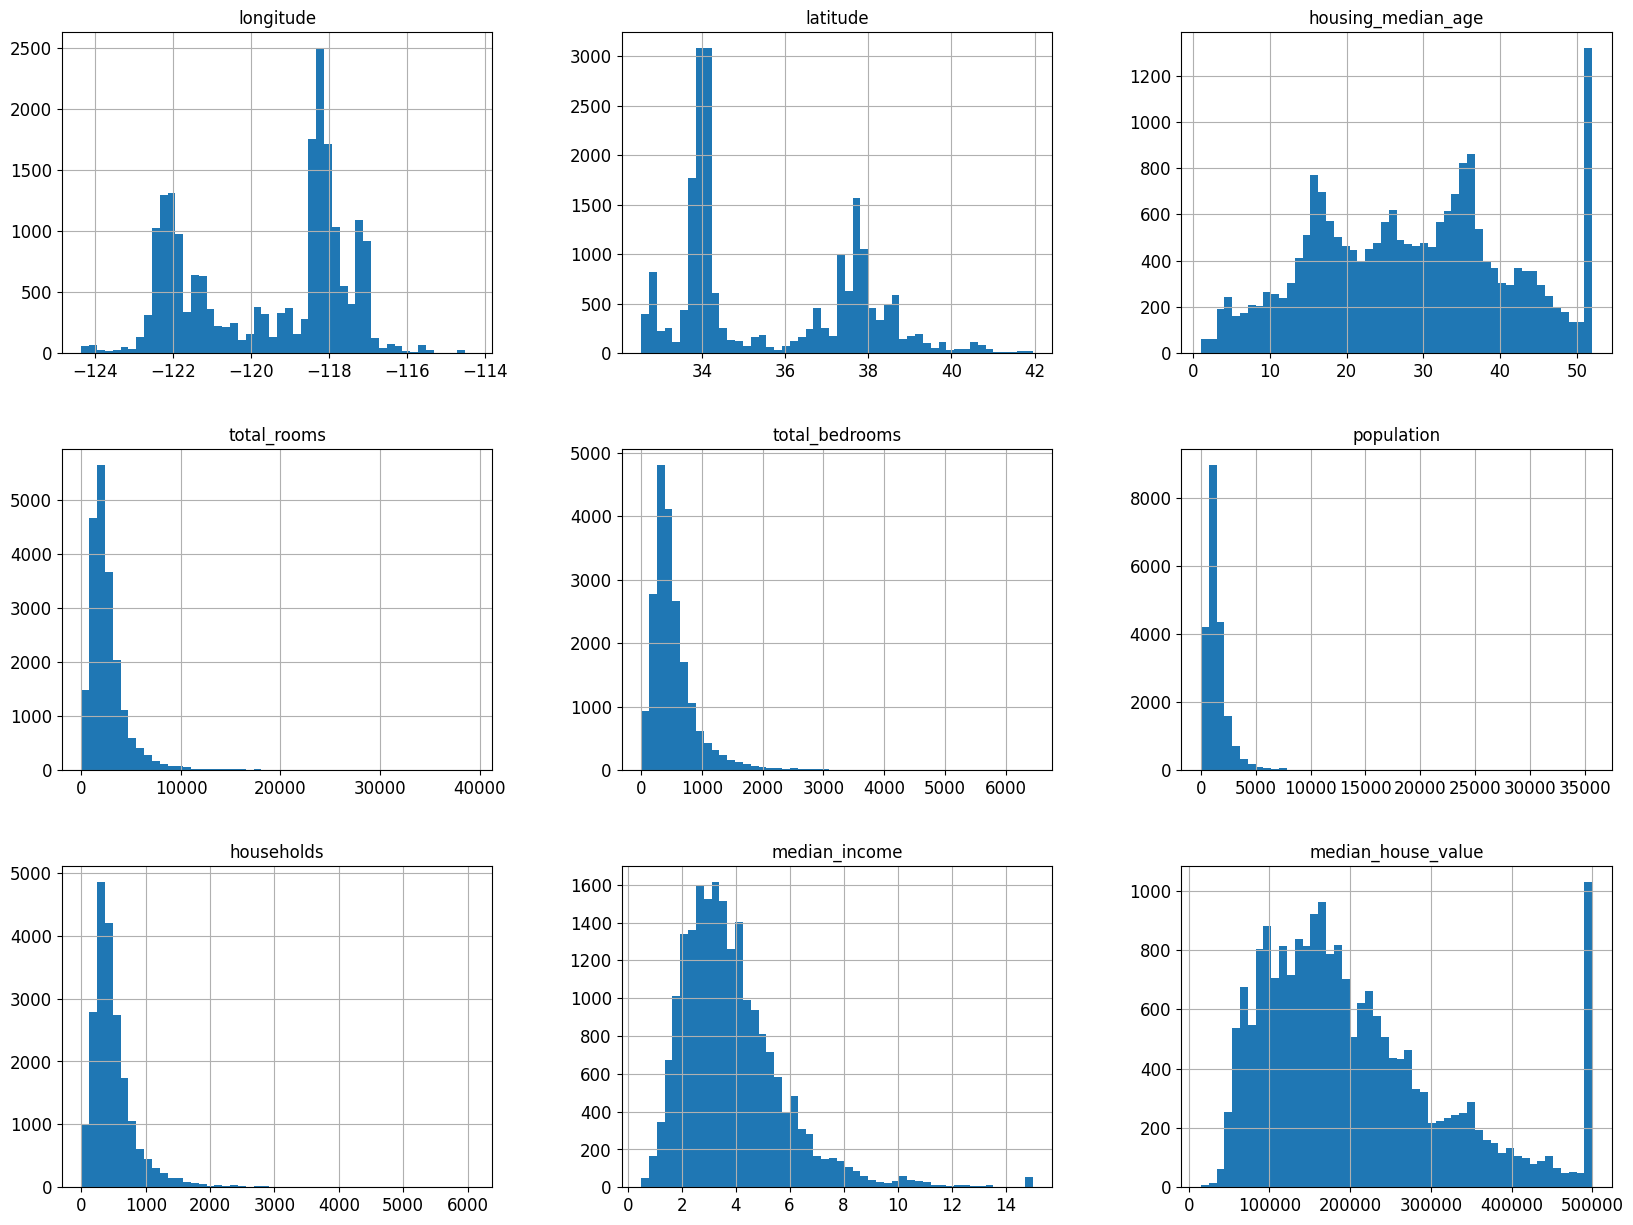

In [125]:
%matplotlib inline
# use jupyter's own backend
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20, 15))
plt.show

In [126]:
# Gaussian distribution: feature has a bell-shaped normal distribution
# about 68% of the values fall within 1 standard deviation of the mean
# 95% within 2 standard deviations, and 
# 99.7% within 3 standard deviations

In [127]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    # for the entire data, shuffle each data point
    test_set_size = int(len(data) * test_ratio)
    # 20% of the data
    test_indices = shuffled_indices[:test_set_size]
    # ask jony
    train_indices = shuffled_indices[test_set_size:]
    # ask jony
    return data.iloc[train_indices], data.iloc[test_indices]
    # ask jony

In [128]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [129]:
len(test_set)

4128

In [130]:
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [131]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [132]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [133]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [134]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


In [135]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

<Axes: >

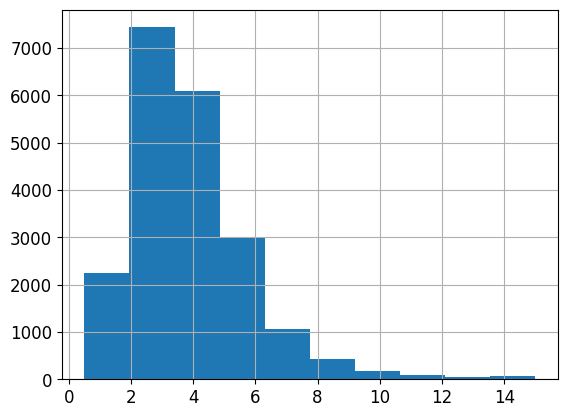

In [136]:
housing["median_income"].hist()

In [137]:
housing["income_cat"] = pd.cut(housing["median_income"], bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1, 2, 3, 4, 5])

In [138]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

<Axes: >

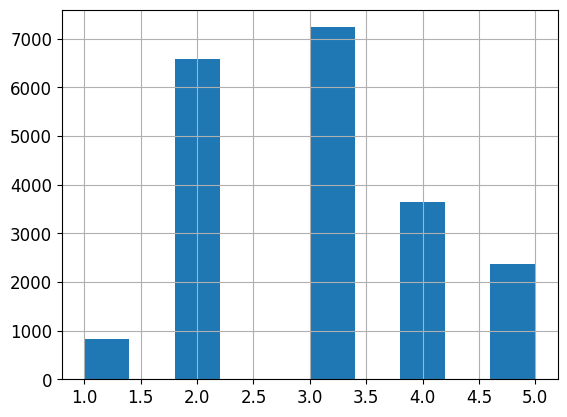

In [139]:
housing["income_cat"].hist()

In [140]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [141]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [142]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [143]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [144]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.02,0.36,0.97
2,31.88,31.88,32.44,-0.02,1.73
3,35.06,35.05,35.85,-0.01,2.27
4,17.63,17.64,16.74,0.03,-5.06
5,11.44,11.43,10.95,-0.08,-4.32


In [145]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_train_set),
    "Random %": income_cat_proportions(train_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,3.98,3.97,-0.09,-0.24
2,31.88,31.89,31.75,0.00,-0.43
3,35.06,35.06,34.86,0.00,-0.57
4,17.63,17.63,17.85,-0.01,1.26
5,11.44,11.45,11.57,0.02,1.08


In [146]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

In [148]:
housing2 = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

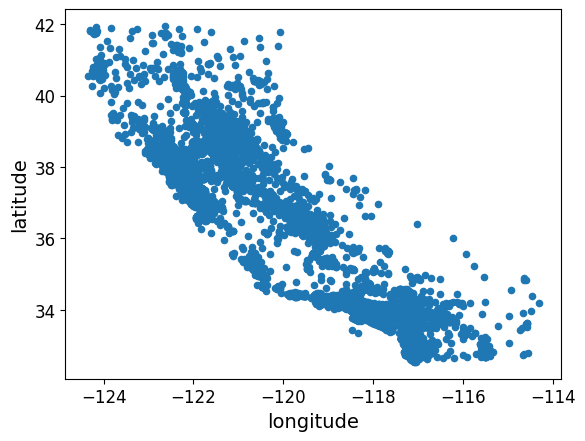

In [149]:
housing2.plot(kind = "scatter", x = "longitude", y = "latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

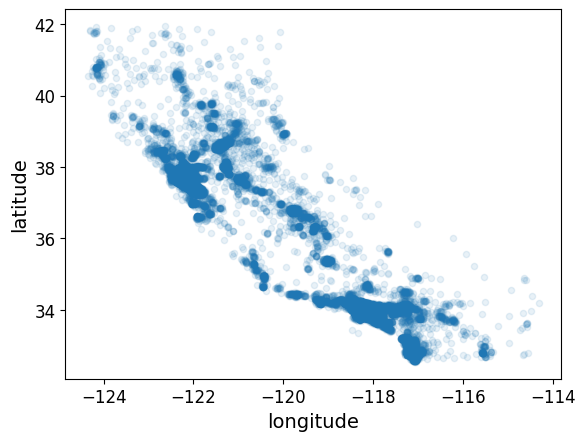

In [150]:
housing2.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)


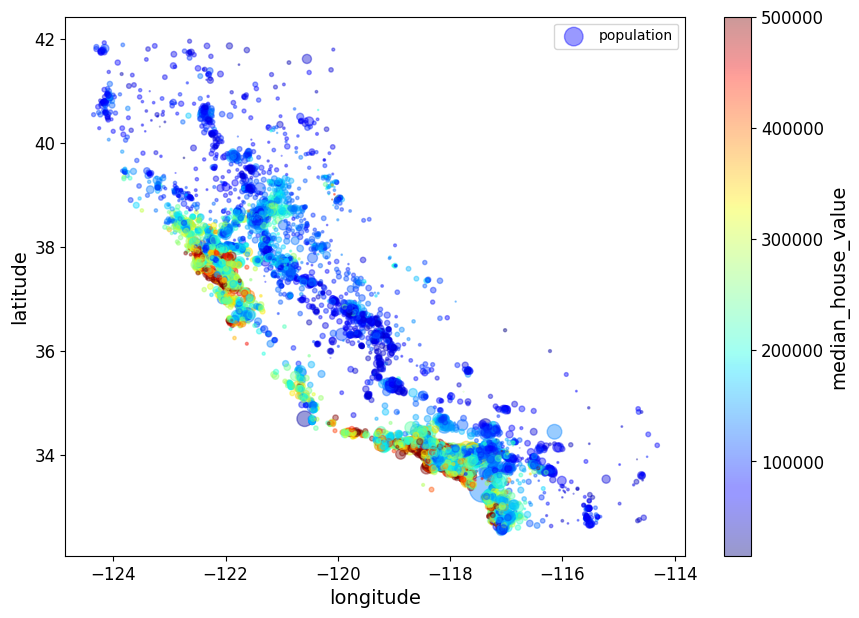

In [154]:
housing2.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, 
              s = housing2["population"]/100, label = "population", figsize = (10, 7),
              c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()

In [167]:
housing2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [170]:
corr_matrix = housing2.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

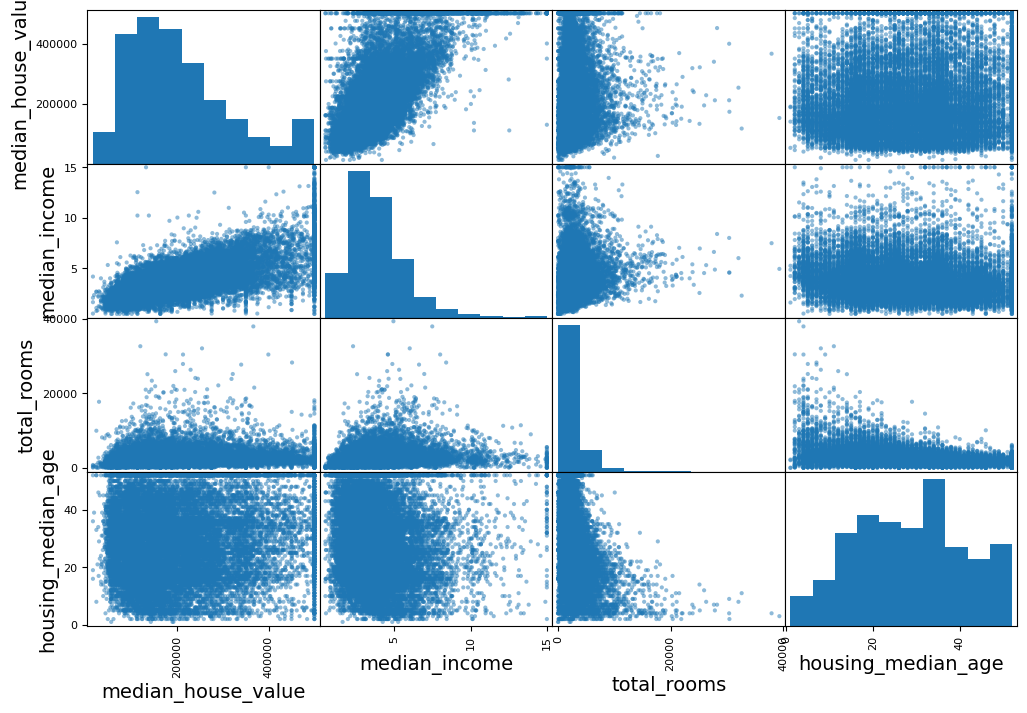

In [171]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12, 8))

In [157]:
housing2["population"]
# housing2.head()

12655    2237.0
15502    2015.0
2908      667.0
14053     898.0
20496    1837.0
          ...  
15174    2026.0
12661    4769.0
19263     458.0
19140    1208.0
19773     625.0
Name: population, Length: 16512, dtype: float64

In [160]:
for p in housing2["population"]:
    print(p / 100)

22.37
20.15
6.67
8.98
18.37
7.24
17.82
7.78
4.08
26.9
7.24
14.41
21.86
16.6
11.64
32.58
11.27
7.62
12.32
4.83
18.51
6.85
4.63
9.29
9.09
39.28
17.76
7.76
15.15
13.45
13.77
16.69
15.77
7.59
9.61
5.55
4.86
13.12
16.7
11.99
15.6
2.72
7.73
16.05
2.08
7.89
27.69
76.53
11.97
21.33
8.0
6.08
28.67
35.3
10.81
13.66
21.01
6.2
36.6
9.91
4.66
15.49
10.4
3.13
22.33
6.96
9.71
17.84
31.39
11.5
11.87
6.89
28.19
10.61
8.92
0.67
4.94
13.7
22.43
29.17
0.34
9.8
12.88
13.29
24.14
29.9
8.25
14.96
4.27
10.64
9.6
10.27
19.7
4.23
7.79
14.79
5.46
11.75
32.95
9.3
5.75
7.48
26.8
33.37
16.9
45.8
11.44
33.88
13.04
18.05
2.61
9.65
8.68
5.11
9.81
23.11
26.54
9.18
12.55
5.72
6.39
0.25
28.17
6.88
9.92
19.47
11.66
12.82
17.49
2.68
8.22
8.7
6.23
4.81
16.39
35.16
17.15
6.64
15.94
11.48
11.94
14.2
4.6
14.03
8.72
8.85
21.53
28.62
5.57
10.25
23.81
16.44
2.63
2.91
11.94
6.62
7.19
40.65
19.04
6.85
11.88
5.14
2.12
0.58
4.03
19.61
15.08
14.63
1.82
10.26
36.46
11.52
12.98
10.56
12.77
22.76
0.39
11.01
20.45
23.0
13.29
27.1
7.22
39.